# Importation

In [1]:
import numpy as np 
from numpy import mean
from scipy.stats import sem
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

from matplotlib import pyplot
import matplotlib.pyplot as plt

import joblib

# Exploratory data analysis
### Importation of the training's data

In [2]:
train = pd.read_csv("...")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Some details about the data

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\cassi\AppData\Local\Temp\ipykernel_11596\3293776033.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


[]

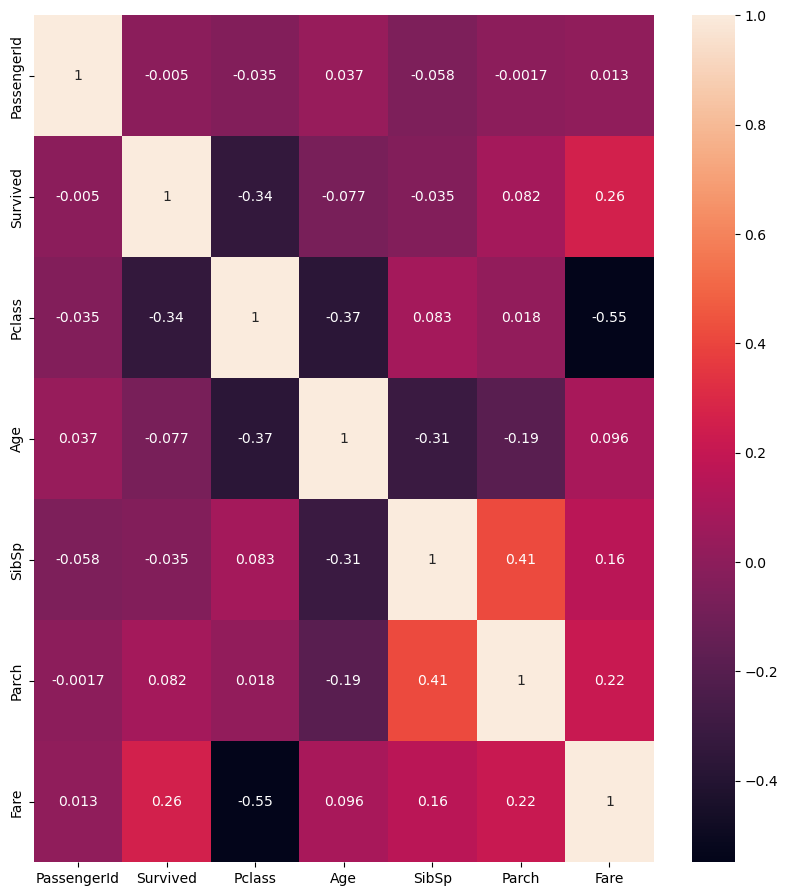

In [4]:
pyplot.figure(figsize=(10,11))
sns.heatmap(train.corr(),annot=True)
pyplot.plot()

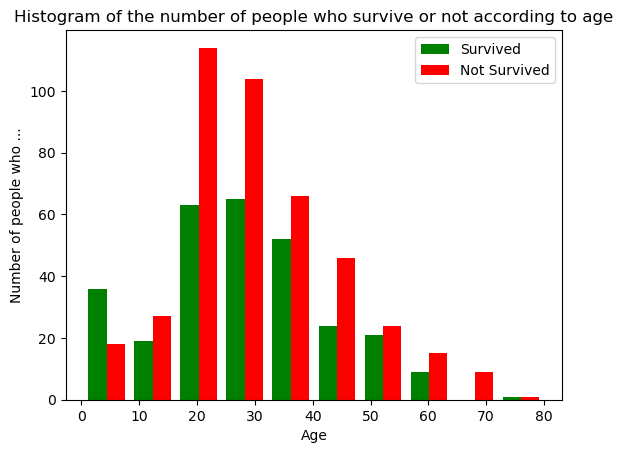

In [5]:
survived_train = train[train["Survived"] == 1]
not_survived_train = train[train["Survived"] == 0]

plt.hist([survived_train["Age"], not_survived_train["Age"]], color=["green", "red"], label=["Survived", "Not Survived"])

plt.title("Histogram of the number of people who survive or not according to age")
plt.xlabel("Age")
plt.ylabel("Number of people who ...")

plt.legend()

plt.show()

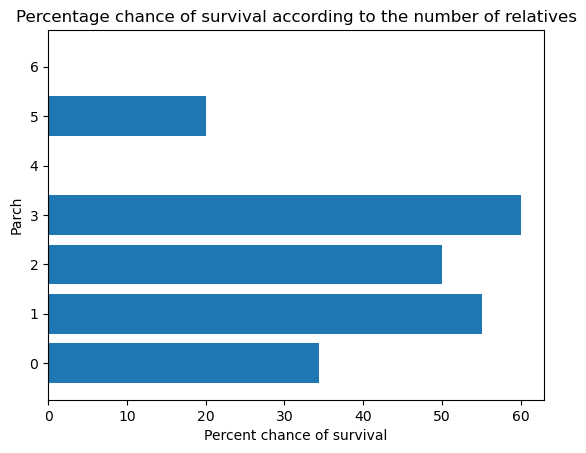

In [6]:
survival_rate = train.groupby("Parch")["Survived"].mean() * 100

parch = survival_rate.index.values

survival_rate = survival_rate.values
survival_rate = np.nan_to_num(survival_rate)

plt.barh(parch, survival_rate)

plt.xlabel("Percent chance of survival")
plt.ylabel("Parch")

plt.title("Percentage chance of survival according to the number of relatives")
plt.show()

# Clean the data
## Cleaning of the training data
### Where do we have a lack of information ?

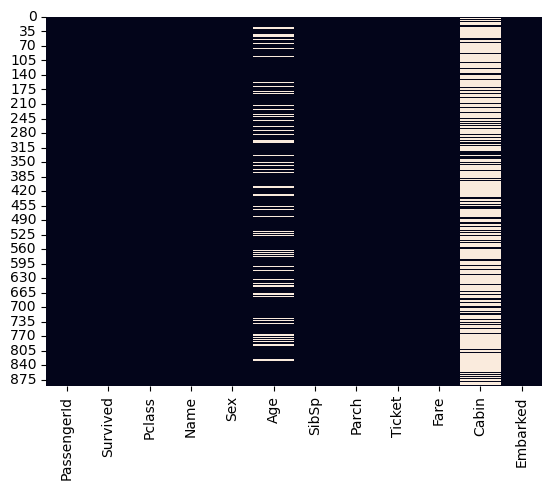

In [7]:
sns.heatmap(train.isnull(),cbar=False)
plt.show()

### We clean the training data 
First we encode sex, embarked and ticket column so that it's no strings anymore

Then we decide to drop the Name and the Cabin. The name is not useful and we dont have enought information for the Cabin

Then for the age column we decide to add the mean value to the NaN values

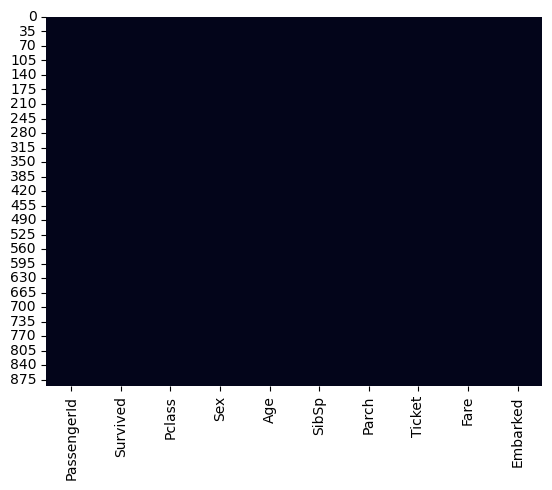

In [8]:
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
train['Embarked']=le.fit_transform(train['Embarked'])
train['Ticket']=le.fit_transform(train['Ticket'])
train = train.drop(columns=["Name","Cabin"])
train.fillna(train.mean(),inplace=True)
sns.heatmap(train.isnull(),cbar=False)
plt.show()


### We want to see if we have outliers values

As we can se we don't have outliers values 

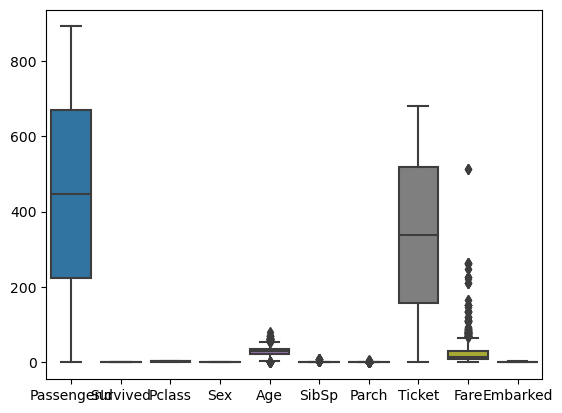

In [9]:
sns.boxplot(data = train)
pyplot.show()

## Cleaning of the testing data

We apply the same treatment as the training data

In [10]:
x_test = pd.read_csv("...")
x_test['Sex'] = le.fit_transform(x_test['Sex'])
x_test['Embarked']=le.fit_transform(x_test['Embarked'])
x_test['Ticket']=le.fit_transform(x_test['Ticket'])
x_test = x_test.drop(columns=["Name","Cabin"])
x_test.fillna(x_test.mean(),inplace=True)
x_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,1,34.5,0,0,152,7.8292,1
1,893,3,0,47.0,1,0,221,7.0000,2
2,894,2,1,62.0,0,0,73,9.6875,1
3,895,3,1,27.0,0,0,147,8.6625,2
4,896,3,0,22.0,1,1,138,12.2875,2


# Split the data into train-test or train-val-test

In [11]:
x_train = train.drop(columns=["Survived"])
y_train = train['Survived']
#We also have x_test from the cell above
y_test = pd.read_csv("/Users/cassi/OneDrive/Documents/ESILV_A3S2/Data_science_and_ia/Projets_finaux/Project_1_titanic/gender_submission.csv")
y_test = y_test.to_numpy()
y_test_col_2 = y_test[:, 1]
y_test = pd.DataFrame(y_test_col_2)

# Build the model

In [12]:
def Model():
    model = LogisticRegression(C=1, max_iter=10000, solver='liblinear', random_state=100)
    model.fit(x_train, y_train)

# Train the model and show performance improvement by hyper-parameter modification. 

## Hyperparameter : Solver

Here we want to find the best solver for the maximum accuracy between newton-cg, lbfgs, liblinear, sag, saga, newton-cholesky. 

In [13]:
def Solver_parameter(sol) : 
    lr = LogisticRegression(C=1, max_iter=10000, solver=sol, random_state=100)

    # Entraîner le modèle sur les données d'entraînement
    lr.fit(x_train, y_train)

    # Faire des prédictions sur les données de test
    y_pred = lr.predict(x_test)

    # Calculer la précision du modèle
    accuracy = accuracy_score(y_test, y_pred)
    print("Precision with",i,": {:.2f}%".format(accuracy * 100))
    return accuracy*100

sols = ['newton-cg','lbfgs','liblinear','sag','saga','newton-cholesky']
liste = []
for i in sols : 
    liste.append(Solver_parameter(i))
    
liste = np.array(liste)

print("\nThe best solver for our model is : ",sols[np.argmax(liste)]," with an accuracy of : ",np.max(liste), "%")


Precision with newton-cg : 92.82%
Precision with lbfgs : 92.82%
Precision with liblinear : 94.02%
Precision with sag : 91.87%
Precision with saga : 88.28%
Precision with newton-cholesky : 92.82%

The best solver for our model is :  liblinear  with an accuracy of :  94.01913875598086 %


In [14]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
}

logreg = LogisticRegression(max_iter=10000)

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

final_model = LogisticRegression(**best_params)
final_model.fit(x_train, y_train)

y_pred = final_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9401913875598086


C:\Users\cassi\anaconda3\envs\py38_1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\cassi\anaconda3\envs\py38_1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\cassi\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\cassi\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_logistic.py", line

# Save the model

In [15]:
model = LogisticRegression(C=1, max_iter=10000, solver='liblinear', random_state=100)
model.fit(x_train, y_train)

joblib.dump(model, 'model_logical_regression_file.pkl')

['model_logical_regression_file.pkl']